# Polynomial Regression Assignment (Please do not remove the output cells)

## The objective is to apply polynomial regression on the provided data using 3 regularization techniques

Tasks are defined below:
1-  Read the dataset, and get acquainted with its features and labels. Check the link below for more details about the data.  
https://archive.ics.uci.edu/ml/datasets/Air+Quality  

2-  This dataset has 5 different output labels. For this assignment we only need the NO2 output. Please drop other outputs.  

3-  Handle missing data similar to what was covered in tutorial 3.  

4-  Replace the date feature with 3 separate features (Day, Month and Year).  

5-  Replace the time feature with 3 separate features (Hours, Minutes and Seconds).  

6-  Apply feature scaling.  

7-  Evaluate different degrees of lasso CV polynomial regression.  

8-  Choose the best degree and print the errors on the test data, model coefficients and the lasso parameters.  

9-  Repeat steps 4 and 5 using Ridge CV polynomial regression.  

10- Repeat steps 4 and 5 using ElasticNet CV polynomial regression.  

11- Compare the errors from the 3 regularization techniques, and save the best model.  

12- Load the best model and test it on a sample that you manually created it.  


## Enter your IDs and Names below

1-   Alaa Amr Abdelazeem 46-12699
  
2-   Salma Khalid Sherif 46-5953


### Imports

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error
# import warnings
# warnings.filterwarnings('ignore')

### 1- Read the data

In [2]:
df = pd.read_csv('AirQualityUCI.csv')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 2- Drop unwanted labels

In [3]:
df = df.drop(['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)'], axis = 1)

### 3- Handle missing data

In [4]:
#Observing the missing data
df.isnull().mean()*100
#As seen belor, it was observed that the missing rate which is 3.91151% is the same error in all features (except dat and time)
#Therefore, it might be the case that the missing data of those features occur in the same rows.

Date              0.00000
Time              0.00000
PT08.S1(CO)       3.91151
PT08.S2(NMHC)     3.91151
PT08.S3(NOx)      3.91151
NO2(GT)          17.54836
PT08.S4(NO2)      3.91151
PT08.S5(O3)       3.91151
T                 3.91151
RH                3.91151
AH                3.91151
dtype: float64

In [5]:
#Dropping the null values of 1 of the 8 features led to 0% error in all other 7 features too.
# Hence it is safe to drop these rows since they yield almost no information.
df = df.dropna(axis=0,subset= ['PT08.S4(NO2)'])
df.isnull().mean()*100

Date              0.000000
Time              0.000000
PT08.S1(CO)       0.000000
PT08.S2(NMHC)     0.000000
PT08.S3(NOx)      0.000000
NO2(GT)          17.773329
PT08.S4(NO2)      0.000000
PT08.S5(O3)       0.000000
T                 0.000000
RH                0.000000
AH                0.000000
dtype: float64

In [6]:
# The only remaining missing null values is in NO2(GT) which is our label.
# Imputing the label or trying to fill in the missing value might confuse the model. 
# Therefore, althought the percentage is quite big 17% however it is safer to drop these rows.
df = df.dropna(axis=0,subset= ['NO2(GT)'] )
df.isnull().mean()*100

Date             0.0
Time             0.0
PT08.S1(CO)      0.0
PT08.S2(NMHC)    0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S1(CO),1.000000,0.887255,-0.764753,0.641529,0.671479,0.897387,0.037803,0.149997,0.145952
PT08.S2(NMHC),0.887255,1.000000,-0.787482,0.646245,0.773759,0.877024,0.244044,-0.069042,0.207012
PT08.S3(NOx),-0.764753,-0.787482,1.000000,-0.652083,-0.519404,-0.792080,-0.125662,-0.086211,-0.228097
NO2(GT),0.641529,0.646245,-0.652083,1.000000,0.157360,0.708128,-0.186533,-0.091759,-0.335022
PT08.S4(NO2),0.671479,0.773759,-0.519404,0.157360,1.000000,0.576766,0.575516,-0.027654,0.651306
PT08.S5(O3),0.897387,0.877024,-0.792080,0.708128,0.576766,1.000000,-0.033249,0.147627,0.077238
T,0.037803,0.244044,-0.125662,-0.186533,0.575516,-0.033249,1.000000,-0.574889,0.661295
RH,0.149997,-0.069042,-0.086211,-0.091759,-0.027654,0.147627,-0.574889,1.000000,0.165301
AH,0.145952,0.207012,-0.228097,-0.335022,0.651306,0.077238,0.661295,0.165301,1.000000


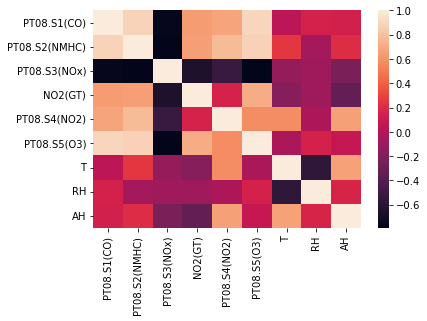

In [7]:
# Exploring the correlation between the features and the label shows that the feature PT08.S4(NO2) has a very weak 
# correlation of 0.15 with the label. However we chose to not drop this feature since in polynomial regression features
# could be combined and maybe combining other features with PT08.S4(NO2) will yield a higher correlation to the label.
corr=df.corr()
sns.heatmap(corr)
corr

### 4- Replace date feature

In [8]:
df['Date']=  pd.to_datetime(df['Date'])
df["Day"] = df['Date'].map(lambda x: x.day)
df["Month"] = df['Date'].map(lambda x: x.month)
df["Year"] = df['Date'].map(lambda x: x.year)
df = df.drop(['Date'], axis = 1)
df.columns

Index(['Time', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Day', 'Month', 'Year'],
      dtype='object')

### 5- Replace time feature

In [9]:
# The time and seconds features were dropped since all entries of these columns are zeros.
df[['Hour', 'Minutes', 'Seconds']] = df['Time'].str.split(':', expand=True)
df = df.drop('Time', axis =1)
df = df.drop('Minutes', axis =1)
df = df.drop('Seconds', axis =1)
df.columns

Index(['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Day', 'Month', 'Year',
       'Hour'],
      dtype='object')

### 6- Apply feature scaling

In [10]:
# Feature scaling was applied here as per required, however since it is preferable to perform scaling
# after choosing polynomial features, therefore in each of the models scaling was performed again.
X = df.drop('NO2(GT)',axis=1)
y = df['NO2(GT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### 7- Evaluate different degrees of lasso CV polynomial regression

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


lasso_train_rmse_errors = []
lasso_test_rmse_errors = []

lasso_train_mse_errors = []
lasso_test_mse_errors = []

lasso_train_mae_errors = []
lasso_test_mae_errors = []
lasso_alphas = []

for d in range(1,7):
    
    print("Degree ", d)
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    #Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # TRAIN ON THIS NEW POLY SET
    lasso_cv_model = LassoCV(alphas=(0.01, 0.1, 1.0, 10), tol='0.01')
    lasso_cv_model.fit(X_train,y_train)
    print(lasso_cv_model.alpha_)
    lasso_alphas.append(lasso_cv_model.alpha_)
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = lasso_cv_model.predict(X_train)
    test_pred = lasso_cv_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    train_MSE = mean_squared_error(y_train,train_pred)
    train_MAE = mean_absolute_error(y_train,train_pred)
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    test_MSE = mean_squared_error(y_test,test_pred)
    test_MAE = mean_absolute_error(y_test,test_pred)

    # Append errors to lists for plotting later
    
    print("Train RMSE: ", train_RMSE)
    print("Test RMSE: ",test_RMSE)
    lasso_train_rmse_errors.append(train_RMSE)
    lasso_train_mse_errors.append(train_MSE)
    lasso_train_mae_errors.append(train_MAE)

    lasso_test_mae_errors.append(test_MAE)
    lasso_test_rmse_errors.append(test_RMSE)
    lasso_test_mse_errors.append(test_MSE)
    

Degree  1
0.01
Train RMSE:  22.104840743687802
Test RMSE:  22.21665395034259
Degree  2
0.01
Train RMSE:  18.746703651327106
Test RMSE:  19.150863752386023
Degree  3
0.01
Train RMSE:  16.915149815308407
Test RMSE:  17.742909458639218
Degree  4
0.01
Train RMSE:  16.02460763252204
Test RMSE:  17.101217134262694
Degree  5
0.01
Train RMSE:  15.317795532056403
Test RMSE:  16.560255799941537
Degree  6
0.01
Train RMSE:  14.756290251139786
Test RMSE:  16.280293280425465


### 8- Choose the best degree and print the errors, model coefficients and the lasso parameters.

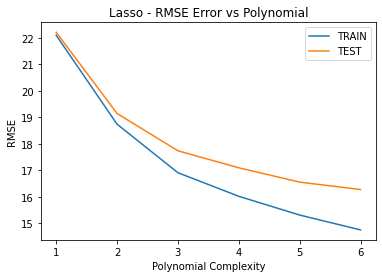

In [37]:
plt.plot(range(1,7),lasso_train_rmse_errors,label='TRAIN')
plt.plot(range(1,7),lasso_test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.title("Lasso - RMSE Error vs Polynomial")
plt.xticks([1,2,3,4,5, 6])
plt.legend()

In [38]:
# Degree 3 will be chosen since higher degrees are showing a gap between the training set & test set (overfitting)
print("Train RMSE")
print(lasso_train_rmse_errors[2])
print("Test RMSE")
print(lasso_test_rmse_errors[2])

print("Train MAE")
print(lasso_train_mae_errors[2])
print("Test MAE")
print(lasso_test_mae_errors[2])

print("Alpha")
print(lasso_alphas[2])

Train RMSE
16.915149815308407
Test RMSE
17.742909458639218
Train MAE
12.476131256432254
Test MAE
12.67406038953971
Alpha
0.01


### 9a- Evaluate different degrees of Ridge CV polynomial regression

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


train_rmse_errors = []
test_rmse_errors = []
alphas = []

for d in range(1,7):
    print("Degree ", d)
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    #Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # TRAIN ON THIS NEW POLY SET
    # ridge_cv_model = RidgeCV(alphas=(0.1 ,1.0, 10))
    ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_squared_error')
    ridge_cv_model.fit(X_train,y_train)
    print("Alpha:", ridge_cv_model.alpha_)
    alphas.append(ridge_cv_model.alpha_)
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = ridge_cv_model.predict(X_train)
    test_pred = ridge_cv_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
    print("Train RMSE: ", train_RMSE)
    print("Test RMSE: ", test_RMSE)
    print("----------------")
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

Degree  1
Alpha: 1.0
Train RMSE:  22.104446314771693
Test RMSE:  22.225818653358594
----------------
Degree  2
Alpha: 0.1
Train RMSE:  18.310759338531735
Test RMSE:  18.708606605294545
----------------
Degree  3
Alpha: 0.1
Train RMSE:  15.659403038696716
Test RMSE:  17.0905176857675
----------------
Degree  4
Alpha: 0.1
Train RMSE:  13.503887450140917
Test RMSE:  17.96461078033405
----------------
Degree  5
Alpha: 0.1
Train RMSE:  11.731232740162328
Test RMSE:  21.67998847004954
----------------
Degree  6
Alpha: 0.1
Train RMSE:  10.256166753914332
Test RMSE:  28.956825787876593
----------------


### 9b- Choose the best degree and print the errors, model coefficients and the Ridge parameters.

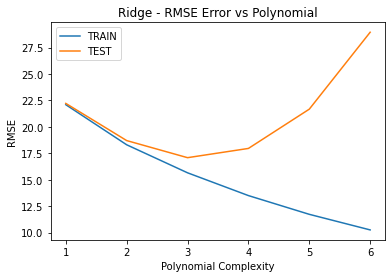

In [27]:
plt.plot(range(1,7),train_rmse_errors,label='TRAIN')
plt.plot(range(1,7),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.title("Ridge - RMSE Error vs Polynomial")
plt.xticks([1,2,3,4,5, 6])
plt.legend()

In [28]:
#Best degree is at degree 3 although there is a small gap between the training error and the test error
#however both errors continued decreasing till the reached the 3rd degree. A higher degree than 3 resulted in
# high levels of overfitting that caused the test error to jumo. 
print("Train RMSE")
print(train_rmse_errors[2])
print("Test RMSE")
print(test_rmse_errors[2])
print("Alphas")
print(alphas[2])


Train RMSE
15.659403038696716
Test RMSE
17.0905176857675
Alphas
0.1


### 10a- Evaluate different degrees of ElasticNet CV polynomial regression

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


en_train_rmse_errors = []
en_test_rmse_errors = []
en_train_mae_errors = []
en_test_mae_errors = []
en_ratios = []

for d in range(1,7):
    print("Degree: ", d)
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    #Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # TRAIN ON THIS NEW POLY SET
    elastic_model  = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
    elastic_model .fit(X_train,y_train)
    print("Ratio: ", elastic_model.l1_ratio_)
    en_ratios.append(elastic_model.l1_ratio_)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = elastic_model.predict(X_train)
    test_pred = elastic_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    train_MAE = mean_absolute_error(y_train,train_pred)
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    test_MAE = mean_absolute_error(y_test,test_pred)
    

    # Append errors to lists for plotting later
    
    print("Train RMSE: ",train_RMSE)
    print("Test RMSE: ",test_RMSE)
    en_train_rmse_errors.append(train_RMSE)
    en_test_rmse_errors.append(test_RMSE)
    en_train_mae_errors.append(train_MAE)
    en_test_mae_errors.append(test_MAE)

Degree:  1
Ratio:  1.0
Train RMSE:  22.111111099032478
Test RMSE:  22.170026638350155
Degree:  2
Ratio:  1.0
Train RMSE:  19.112301273049184
Test RMSE:  19.314435382887904
Degree:  3
Ratio:  1.0
Train RMSE:  17.591269529048407
Test RMSE:  18.131862497992064
Degree:  4
Ratio:  1.0
Train RMSE:  16.871642294086474
Test RMSE:  17.534256141064663
Degree:  5
Ratio:  0.99
Train RMSE:  16.392686975263057
Test RMSE:  17.276305075877517
Degree:  6
Ratio:  1.0
Train RMSE:  15.980209657598406
Test RMSE:  16.948998343883563


### 10b- Choose the best degree and print the errors, model coefficients and ElasticNet parameters.

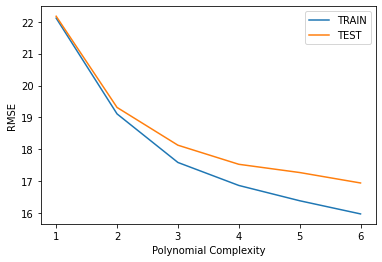

In [31]:
plt.plot(range(1,7),en_train_rmse_errors,label='TRAIN')
plt.plot(range(1,7),en_test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [33]:
#Best degree is degree 3. Where the gap between the 2 rmse of the train & test set start to increase. So in order to avoid overfitting degree 3 will be chosen
print("Train RMSE")
print(en_train_rmse_errors[2])
print("Test RMSE")
print(en_test_rmse_errors[2])

print("Train MAE")
print(en_train_mae_errors[2])
print("Test MAE")
print(en_test_mae_errors[2])

print("Ratio")
print(en_ratios[2])

Train RMSE
17.591269529048407
Test RMSE
18.131862497992064
Train MAE
12.962898134586052
Test MAE
13.030641531640667
Ratio
1.0


### 11- Compare the errors from the 3 regularization techniques, and save the best model.

0.1

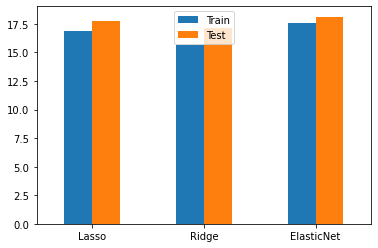

In [34]:
train_rmse = [16.92, 15.66, 17.6]
test_rmse = [17.74, 17.1, 18.13]
index = ['Lasso', 'Ridge', 'ElasticNet']
df = pd.DataFrame({'Train': train_rmse, 'Test': test_rmse}, index=index)
ax = df.plot.bar(rot=0)
0.1

### 12- Load the best model and test it on a sample that you manually created it.

## Great work!
----